In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

# Problem Statement

This project aims to develop a predictive model that recommends the most suitable crops to grow on a particular farm based on various factors such as soil Nitrogen (N), Phosphorous (P), and Potassium (K) content, temperature, humidity, soil pH, and rainfall. 
By analyzing these variables, the model will help farmers make informed decisions about their crop selection, optimizing their farming strategy in accordance with precision agriculture practices. 
The dataset is based on rainfall, climate, and fertilizer data collected from different regions in India.

In [12]:
df = pd.read_csv(r'C:\Users\JUBOB\Desktop\MLProject\Crop_recommendation.csv')

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## top 5

In [14]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Show shape of dataset

In [15]:
df.shape

(2200, 8)

## 2. Data fields
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

## 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [16]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## 3.1  Check Missing values

In [17]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

## 3.3 Check data type

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## 3.4 Check the number of unique values of each column

In [20]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

### Insight

* The label has 22 categories
* it is interesting to know that there is no value reptition in temperature, humidity, ph and rainfal

## 3.5 Check statistics of data set

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


#### Insights

* Nitrogen (N) Content: The average nitrogen content in the soil is approximately 50.55, with a standard deviation of 36.92, indicating substantial variability.
  The range of nitrogen content varies widely, from 0 to 140, showing that some soils have no nitrogen while others have high concentrations.

* Phosphorous (P) Content: The mean phosphorous content is 53.36, with a standard deviation of 32.99, also reflecting variability.
  The minimum value is 5, and the maximum is 145, suggesting a wide range of phosphorous levels in the dataset.

* Potassium (K) Content: The potassium content has an average of 48.15 with a larger standard deviation of 50.65, suggesting high variability.
  Potassium values range from a low of 5 to a high of 205, indicating significant differences across farms.

* Temperature: The average temperature is 25.62°C, with a standard deviation of 5.06°C.
  Temperatures range from a low of 8.83°C to a high of 43.68°C, indicating that the dataset covers areas with significantly different climates.

* Humidity: Humidity has a mean of 71.48%, with a relatively large standard deviation of 22.26%.
  The humidity values vary widely, from a low of 14.26% to a maximum of nearly 100%, indicating diverse environmental conditions.

* pH: The average pH level of the soil is 6.47, with a standard deviation of 0.77, indicating that most soils are mildly acidic.
  The pH ranges from 3.50 to 9.94, showing the presence of both highly acidic and slightly alkaline soils.

* Rainfall: The average rainfall is 103.46 mm, with a standard deviation of 54.96 mm. 
  Rainfall ranges from 20.21 mm to 298.56 mm, illustrating that the dataset includes regions with both low and high rainfall.

## 3.6 Check various categories present in the different categorical column

In [22]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Univerate 

Text(0.5, 1.0, 'Histogram of rainfall')

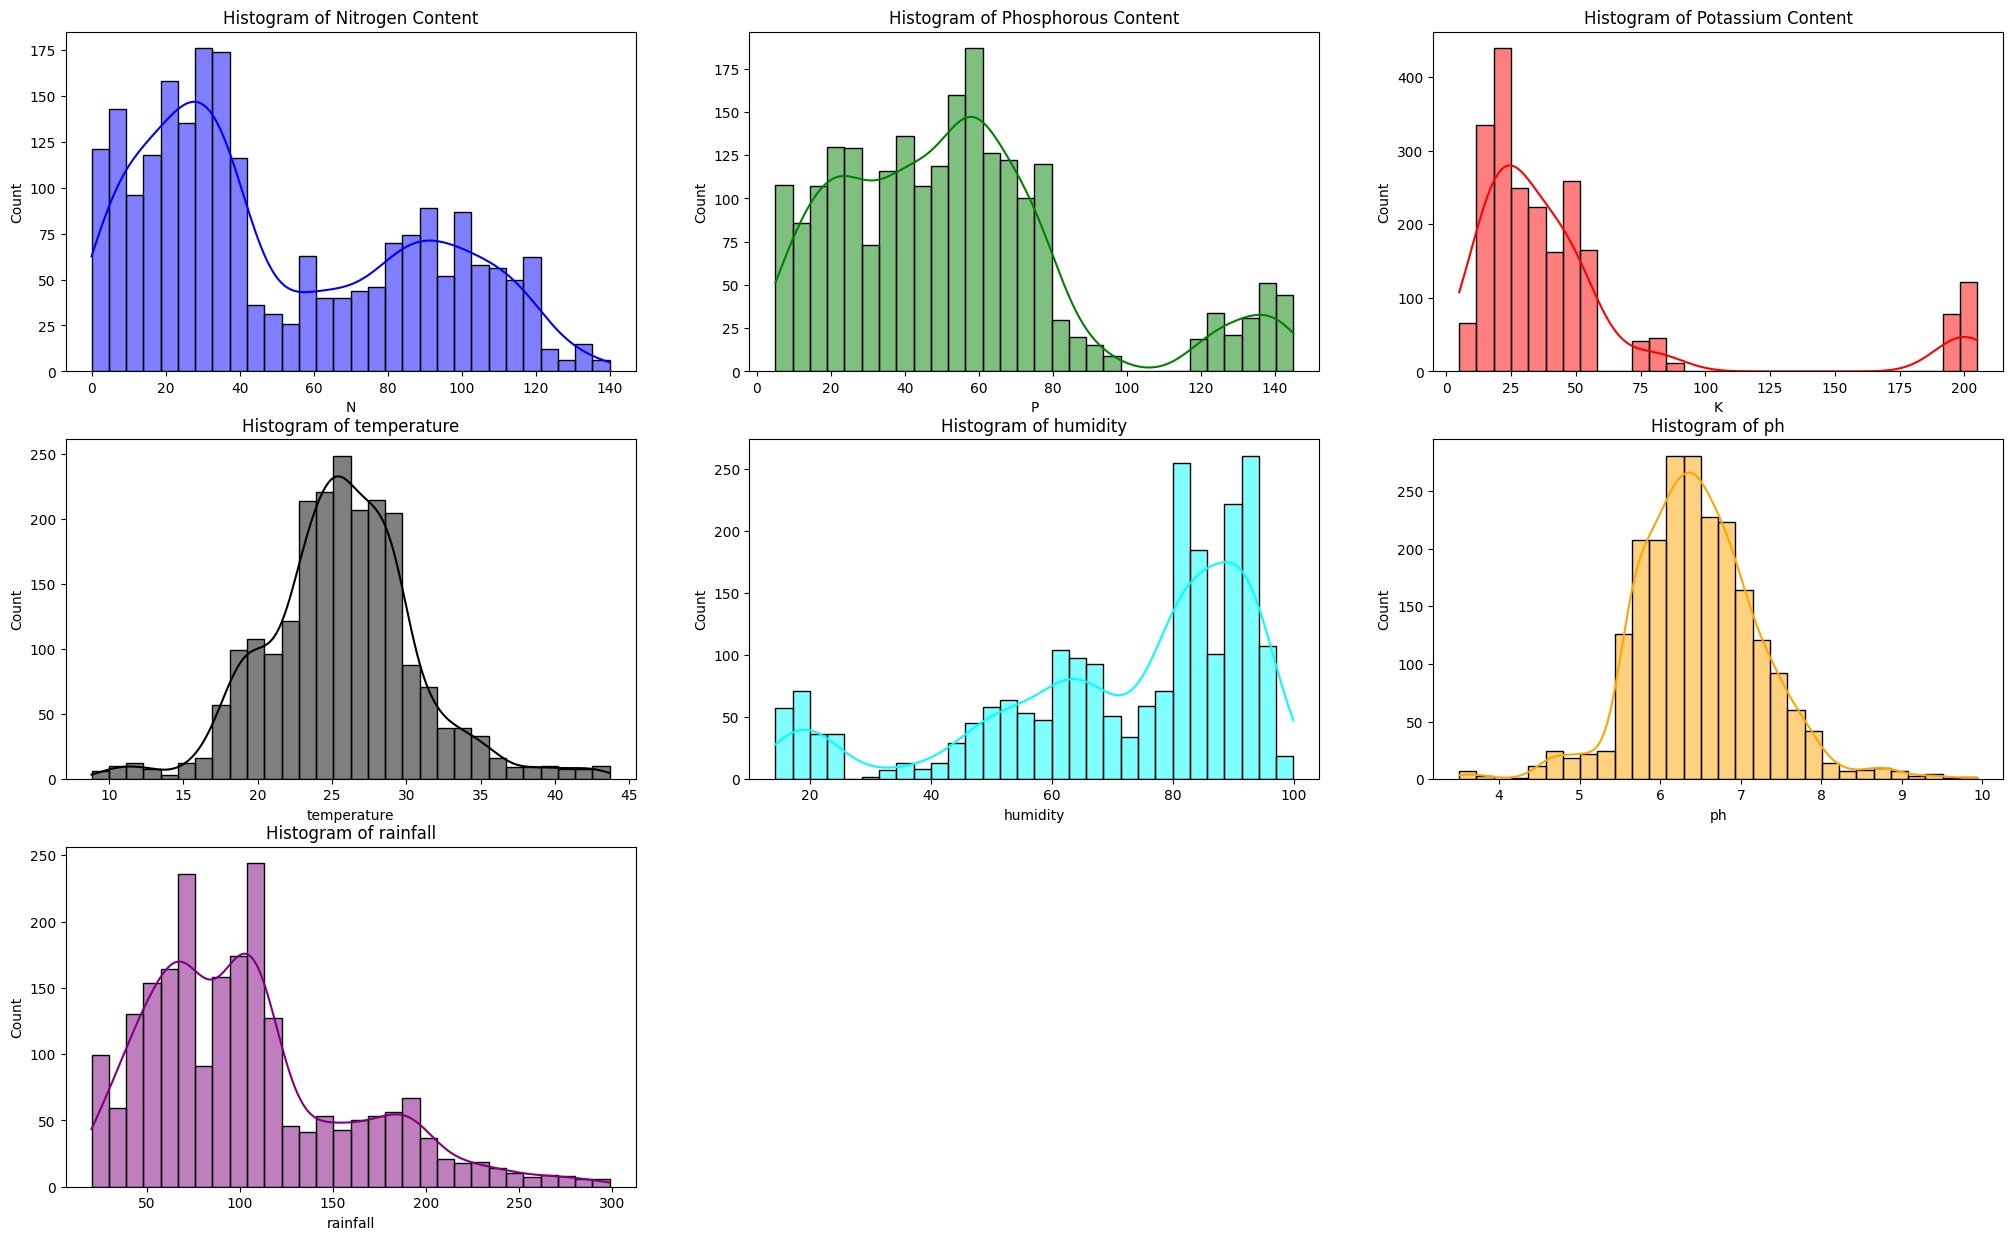

In [17]:

# Setting up the plotting environment
plt.figure(figsize=(25, 15))

# 1. Histogram of Nitrogen (N) Content
plt.subplot(3, 3, 1)
sns.histplot(df['N'], kde=True, bins=30, color='blue')
plt.title('Histogram of Nitrogen Content')

# 2. Histogram of Phosphorous (P) Content
plt.subplot(3, 3, 2)
sns.histplot(df['P'], kde=True, bins=30, color='green')
plt.title('Histogram of Phosphorous Content')

# 3. Histogram of Potassium (K) Content
plt.subplot(3, 3, 3)
sns.histplot(df['K'], kde=True, bins=30, color='red')
plt.title('Histogram of Potassium Content')

# 3. Histogram of Potassium (K) Content
plt.subplot(3, 3, 4)
sns.histplot(df['temperature'], kde=True, bins=30, color='black')
plt.title('Histogram of temperature')

plt.subplot(3, 3, 5)
sns.histplot(df['humidity'], kde=True, bins=30, color='cyan')
plt.title('Histogram of humidity')

plt.subplot(3, 3, 6)
sns.histplot(df['ph'], kde=True, bins=30, color='orange')
plt.title('Histogram of ph')

plt.subplot(3, 3, 7)
sns.histplot(df['rainfall'], kde=True, bins=30, color='purple')
plt.title('Histogram of rainfall')

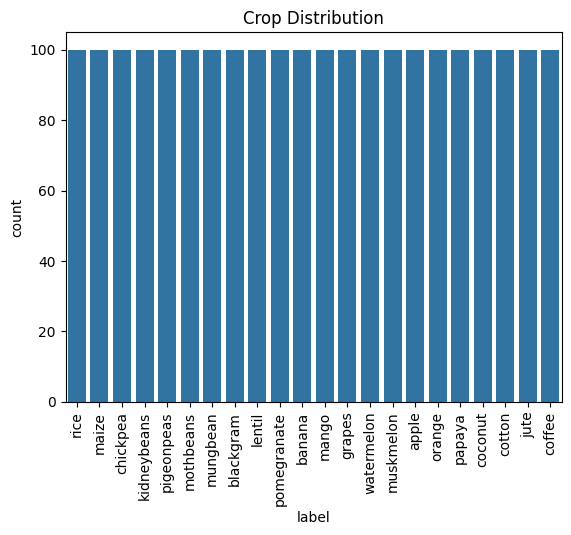

In [17]:
sns.countplot(x='label', data=df)
plt.title('Crop Distribution')
plt.xticks(rotation=90)
plt.show()

### Insights
* The class are equally distributed, so therefore the issues associated with class imblance is avoided

In [25]:
numeric_columns =df.select_dtypes(include=["float64","int64"]).columns

Text(0.5, 1.0, 'Correlation Matrix')

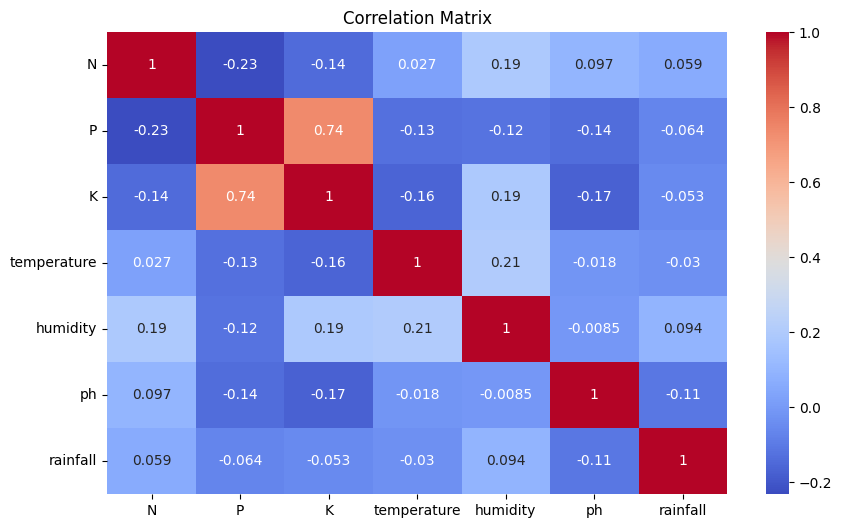

In [37]:

corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

### Insight

* The correlation coefficient between phosphorus (P) and potassium (K) is 0.74, indicating a strong positive relationship. A

* The correlations between environmental factors (temperature, humidity, rainfall, pH) and the nutrient variables (N, P, K) are mostly weak.

* There is a moderate positive correlation (0.21) between humidity and temperature, suggesting that higher temperatures are associated with higher humidity levels 

* Rainfall shows weak correlations with all variables, the highest being with humidity (0.094) and N (0.059). 

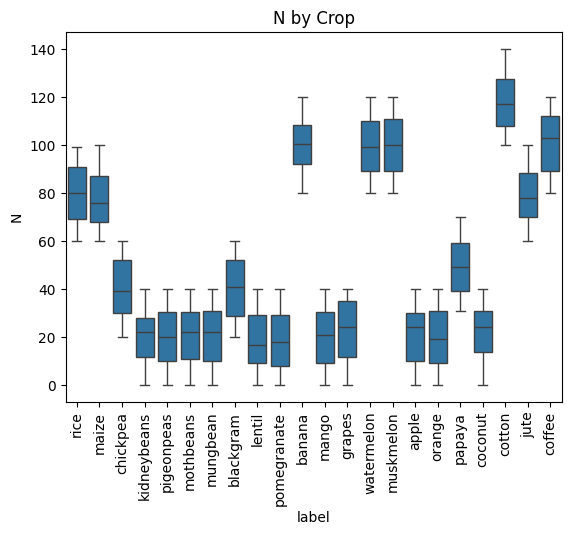

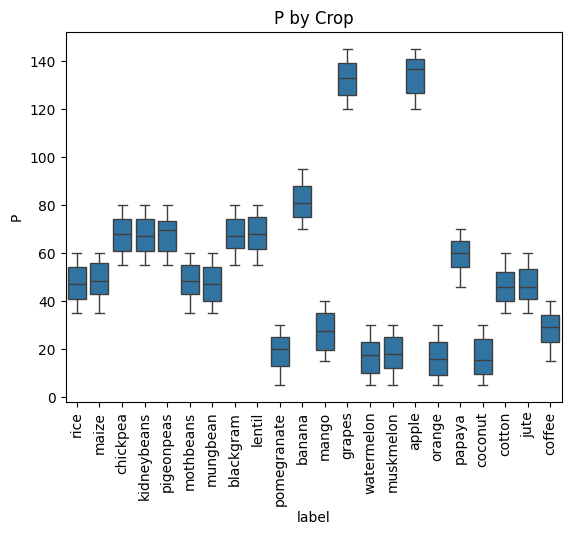

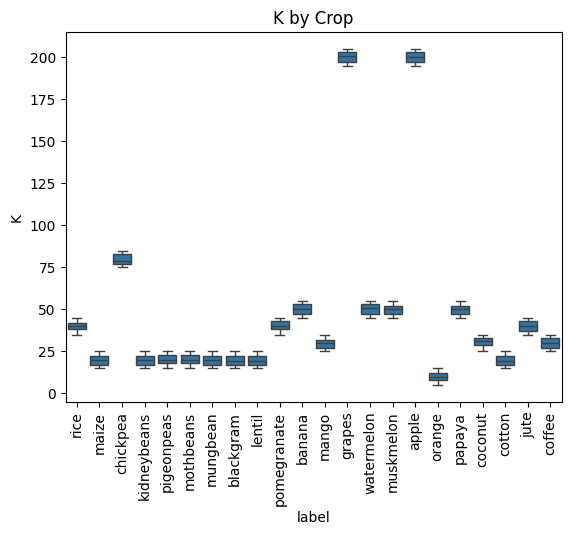

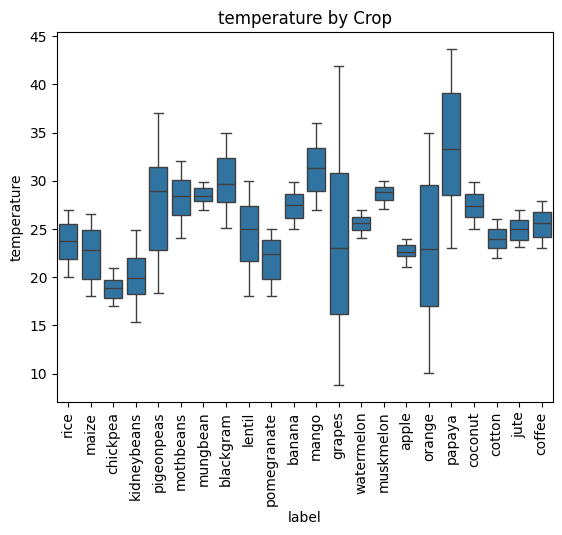

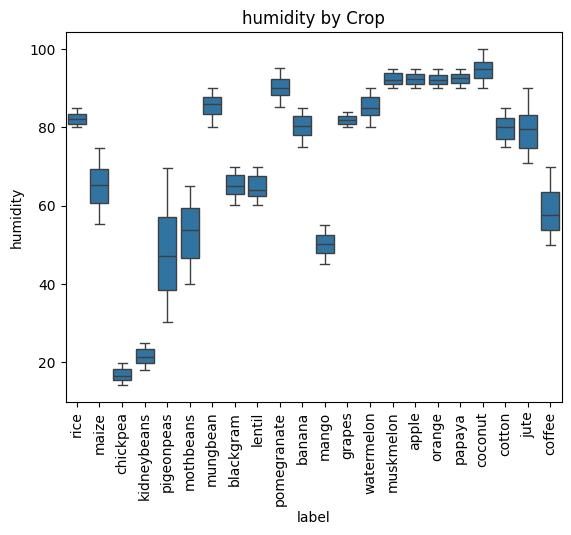

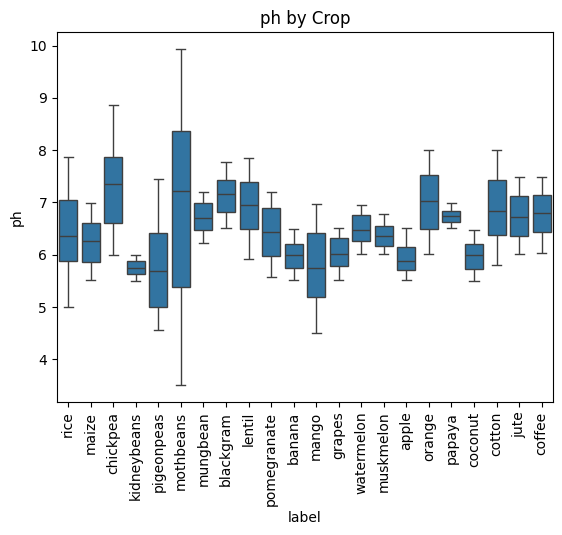

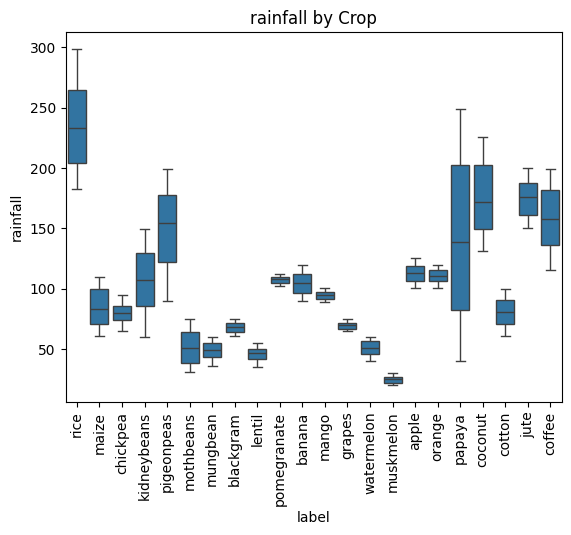

In [32]:
for col in numeric_columns:
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'{col} by Crop')
    plt.xticks(rotation=90)
    plt.show()